# Generators function

The generator function is a function that is responsible for generating a sequence of values. We can write generator functions just like ordinary functions, but they use **yield** keywords to return values.

**Example 1:** Write a program to generate three values A, B, and C.

In [1]:
def mygen():
  yield 'A'
  yield 'B'
  yield 'C'

g=mygen()
print(type(g))    # <class 'generator'>

print(next(g))
print(next(g))
print(next(g))
print(next(g))    # StopIteration exception

# Better approach to prevent StopIteration exception
g=mygen()
for x in g:
  print(x)

<class 'generator'>
A
B
C


StopIteration: 

**Example 2:** Write a generator function to generate values for the countdown with the provided max value.

In [3]:
def countdown(num):
  print("Start Countdown")
  while(num>0):
    yield num
    num=num-1
values=countdown(5)
for x in values:
    print(x)

Start Countdown
5
4
3
2
1


**Example 3:** To generate the first n numbers

In [4]:
def firstn(num):
  n=1
  while n<=num:
    yield n
    n=n+1

values=firstn(5)
for x in values:
  print(x)

1
2
3
4
5


**We can convert the generator into the list as follows:**

In [5]:
values = firstn(10)
l1 = list(values)
print(l1)         # [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**Example 4:** To generate Fibonacci Numbers

The next is the sum of the previous 2 numbers. For example → 0, 1, 1, 2, 3, 5, 8, 13, 21, ...

In [7]:
def fib():
  a,b=0,1
  while True:
    yield a
    a,b=b,a+b

for f in fib():
  if f>100:
    break
  print(f)

0
1
1
2
3
5
8
13
21
34
55
89


# Generator Comprehension

```
# comprehension concept is not applicable for tuple. Below object is a Generator.
g = (x*x for x in range(1000000000))

print(type(g))      # <class 'generator'>

while True:
  print(next(g))
```

Generator comprehension is often used for creating a modified generator from an existing generator object at runtime.

Here, the **range(1000000000)** function returns a generator using which we are creating our own modified/custom generator.

# Traditional Collection vs Generators

## Traditional Collection

```
l = [x*x for x in range(100000000000)]    # list comprehension
print(type(l))  
print(l)
print(l[0])
```

**In the traditional collection, all objects will be created at the beginning and stored in heap memory.**
* Here, at line 1 → **100000000000** object will be created and stored in heap memory. 
* This will lead to **memory problems**.

## Generator function

```
# comprehension concept is not applicable for tuple. Below object is a Generator.
g = (x*x for x in range(1000000000))
print(type(g))      # <class 'generator'>
while True:
  print(next(g))
```

It will generate the sequence of numbers but not all the objects will be created at the beginning.
* Because the generator ***won’t store any objects in memory***.
* Every time the **`next( )`** function is called, the generator executes and provides the required value.
* That’s why the generator will never create any memory problems.

# Generators vs Normal Collections wrt Performance

```
import random
import time

names = ['Sunny','Bunny','Chinny','Vinny']
subjects = ['Python','Java','Blockchain']

def people_list(num_people):
  results = []
  for i in range(num_people):
    person = {
      'id':i,
      'name': random.choice(names),
      'subject':random.choice(subjects)
    }
    results.append(person)
  return results


def people_generator(num_people):
  for i in range(num_people):
    person = {
      'id':i,
      'name': random.choice(names),
      'major':random.choice(subjects)
    }
    yield person

'''''
t1 = time.clock()
people = people_list(10000000)
t2 = time.clock()
'''

t1 = time.clock()
people = people_generator(10000000)
t2 = time.clock()

print('Took {}'.format(t2-t1))

```

> ***Note**: In the above program observe the difference wrt execution time by using list and generators.*

# Generators vs Normal Collections wrt memory utilization

## Normal Collection

```
l=[x*x for x in range(10000000000000000)]
print(l[0])
```

We will get **MemoryError** in this case because all these values are required to be stored in the memory.

## Generators

```
g=(x*x for x in range(10000000000000000))
print(next(g))
```
**Output: 0**

We won't get any MemoryError because the values won't be stored at the beginning

# Advantages of generator functions

* When compared with **class-level iterators**, generators are very easy to use.
* Improves memory utilization and performance.
* Generators are best suitable for reading data from a large number of files.
* Generators work great for web scraping and crawling.

# Limitations of generator functions

* No stored data.
* Direct element access is not possible. For example, if we want the 3rd element, first we need to generate the first two elements in the sequence then only we can get the 3rd element.

# Generator Class

A Generator is an Iterator that implements **`__next__( )`** dunder/magic method.

But ***instead of iterating and returning the next value from a sequence***, the **`next( )`** method generates a new object/value every time it is invoked and returns the newly generated object/value.

**Note:**
* The **Generator class** does not use the **yield** keyword.
* All objects that have **`__next__( )`** dunder/magic method are called **Iterators**.
* So, **all Generators are Iterators**.
* But, **all Iterators are not Generators**.
    * Iterators is simply meant for iterating a sequence of objects/values.
    * Not all iterators necessarily have to generate something every time the **`next( )`** method is called.

**Example:**

In [4]:
class FirstHundredGenerator:
  def __init__(self):
    self.number = 0
  
  def __next__(self):
    if self.number > 100:
      current = self.number
      self.number += 1
      return current
    else:
      StopIteration()

my_gen = FirstHundredGenerator()

print(my_gen.number)              # 0
print(my_gen.__next__())          # 0  
# next() method return the current number and then increment the number by 1 
                 
print(my_gen.number)              # 1   
print(next(my_gen))               # 1     
# next() method return the current number and then increment the number by 1

print(my_gen.number)              # 2


0
None
0
None
0


In this generator example, it is not storing all 100 values in memory, rather generates one value at a time and returns it, as we call the **`next( )`** method on it.

# Iterable Generator Class

All Generators are iterators but **not an Iterable**. 

So a Generator by default cannot be iterated using a **for loop** or used with **aggregation functions** such as **`sum( )`**, **`count( )`**, **`list( )`**, etc.

In [5]:
my_gen = FirstHundredGenerator()
for i in my_gen:        # TypeError: 'FirstHundredGenerator' object is not iterable
  print(i)

TypeError: 'FirstHundredGenerator' object is not iterable

To make a generator iterable, we need to implement **`__iter__( )`** dunder/magic method which returns an **iterator** object that ***allows iterating through all the values*** of the Iterable object.

```
class FirstHundredItreable:
  def __iter__(self):
    return FirstHundredGenerator()    # since all generator are iterator. so we can return generator object from __iter__() function.
    
my_gen = FirstHundredItreable()

print(sum(my_gen))

for i in my_gen: 
  print(i)
```

**Example:**

In [9]:
class FirstHundredIterableGenerator:
  def __init__(self):
    self.number = 0
  
  def __next__(self):
    if self.number > 100:
      current = self.number
      self.number += 1
      return current
    else:
      StopIteration()
  
  def __iter__():
    return self

```
my_gen = FirstHundredIterableGenerator()

print(sum(my_gen))

for i in my_gen: 
  print(i)
```

# Decorator vs. Generator

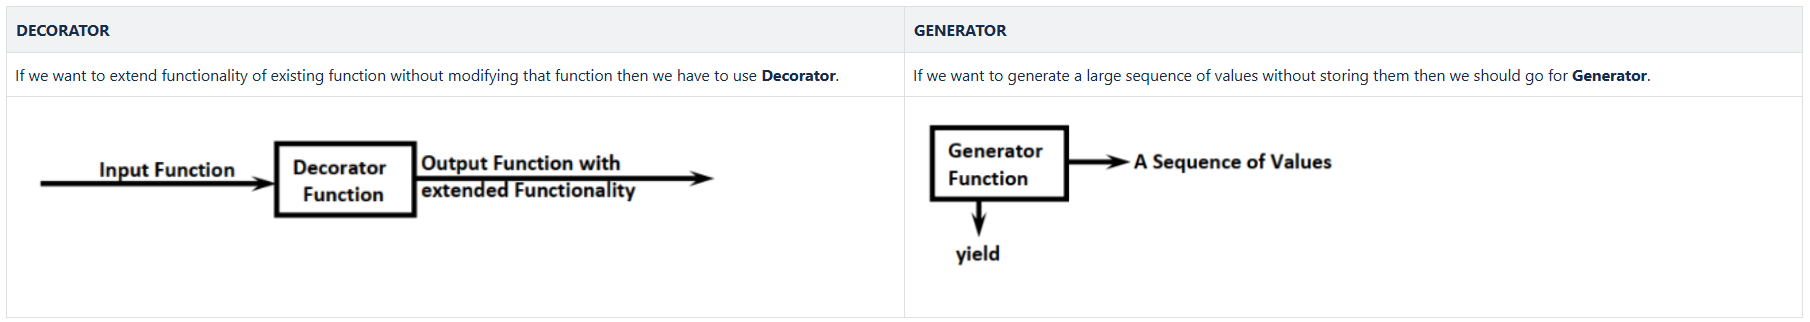